# Qualifying Exam Plots

In [2]:
library(ggplot2)
library(mvtnorm)
library(gridExtra)
library(cowplot)
library(ggExtra)
library(latex2exp)

In [3]:
source('~/isolines_uq/scripts/R/auxiliary_scripts/distributionIsolines.R')
source('~/isolines_uq/scripts/R/auxiliary_scripts/projection.R')
source('/global/u1/j/jbbutler/isolines_uq/scripts/R/auxiliary_scripts/utils.R')
source('~/isolines_uq/scripts/R/confidence_regions_procedure/confidenceRegions.R')

perlpath <- Sys.getenv('PSCRATCH')

Warning message:
“package ‘MASS’ was built under R version 4.2.3”
Loading required package: mgcv

Warning message:
“package ‘mgcv’ was built under R version 4.2.3”
Loading required package: nlme

This is mgcv 1.8-42. For overview type 'help("mgcv-package")'.

Warning message:
“package ‘evd’ was built under R version 4.2.3”
Warning message:
“package ‘chron’ was built under R version 4.2.3”
Warning message:
“package ‘ks’ was built under R version 4.2.3”
Warning message:
“package ‘dplyr’ was built under R version 4.2.3”

Attaching package: ‘dplyr’


The following object is masked from ‘package:nlme’:

    collapse


The following object is masked from ‘package:MASS’:

    select


The following object is masked from ‘package:gridExtra’:

    combine


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘purrr’ was built under R version 4.2.3”
War

## Distribution Tail Symbol

In [186]:
vals <-  seq(0, 5, length.out = 1000)
density <- dt(vals, df=2)
plt_df <- data.frame(vals = vals, density = density)

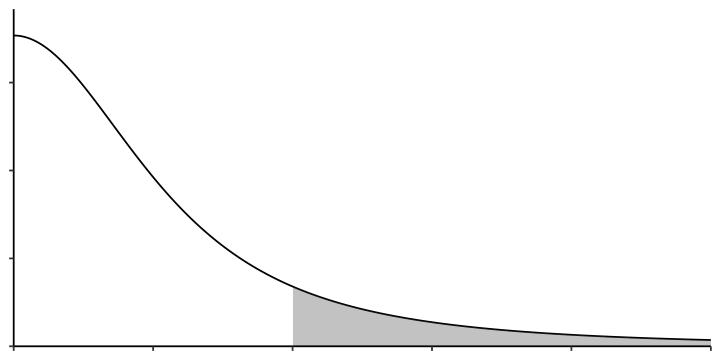

In [187]:
options(repr.plot.width=6, repr.plot.height=3, scipen=999)
ggplot(plt_df) + geom_line(aes(x = vals, y = density)) + 
coord_cartesian(ylim=c(0, max(density)+0.03), xlim = c(0, 5), expand=FALSE) +
geom_ribbon(data=subset(plt_df,vals>2),aes(x=vals,ymax=density),ymin=0,alpha=0.3) + 
xlab('') + ylab('') + theme_classic() + theme(
        text = element_blank(),
        title = element_blank())

## Cooley Data Plot

In [188]:
# uploading AI and AD datasets from Cooley et al. (2019)
load('~/isolines_uq/data/cooley_data/karachiDatDaily.Rdata')
karachi_data <- karachiDatDaily[,c(3,4)]
colnames(karachi_data) <- c('X1', 'X2')
load('~/isolines_uq/data/cooley_data/santaAnaBivariate.Rdata')
santa_ana_data <- saDat[,c(4,5)]
colnames(santa_ana_data) <- c('X1', 'X2')

ignition_dates = saDat %>% filter(date == '10/21/07' | date == '11/15/08' | date == '10/25/03' | date == '11/14/2008'| date=='10/27/1993' | date == '10/26/2006')
ignition_inds = which(saDat$date == '10/21/07' | saDat$date == '11/15/08' | saDat$date == '10/25/03' | saDat$date == '11/14/2008'| saDat$date=='10/27/1993' | saDat$date == '10/26/2006')
heat_wave_dates = karachiDatDaily %>% filter(date >= '06/20/15', date <= '06/25/15')

In [189]:
pltSA <- ggplot() + geom_point(data=santa_ana_data, aes(x = X1, y = X2), alpha=0.2) + 
xlab('Wind Speed (m/s)') + ylab('Negative Relative Humidity (%)') + 
geom_point(data=ignition_dates, aes(x = windspeeds, y = neg_relHum), color = 'red', size=13, shape='*') +
coord_cartesian(ylim=c(-100, 0), xlim = c(0, 15), expand=F) +
theme_light() + 
ggtitle('Santa Ana Wildfire Risk, CA') + 
theme(legend.position = c(0.75, 0.2), 
      legend.title = element_blank(), 
      axis.title = element_text(size = 20), 
      axis.text = element_text(size = 20), 
      legend.spacing.y = unit(0.002, 'cm'),
      text = element_text(size = 20),
      plot.title = element_text(size=24),
      legend.text = element_text(size=15),
      legend.background = element_blank(),
      legend.box.background = element_rect(fill = "white", color = "black"))
pltSA_margins <- ggMarginal(pltSA, type='histogram')

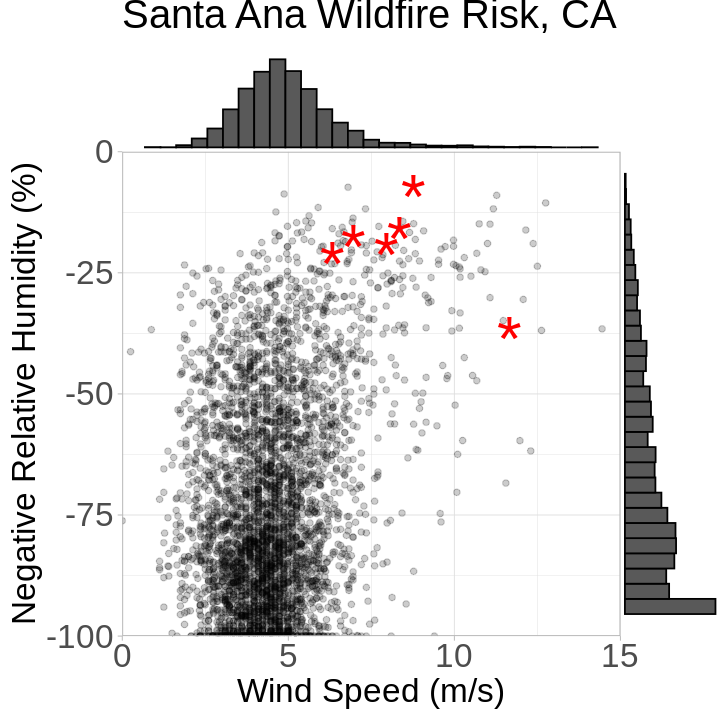

In [190]:
options(repr.plot.width=6, repr.plot.height=6, scipen=999)
pltSA_margins
ggsave(filename='~/isolines_uq/plots/quals_plots/santa_ana_intro.png', plot=pltSA_margins, device='png', width=6, height=6)

In [191]:
pltKa <- ggplot() + geom_point(data=karachi_data, aes(x = X1, y = X2), alpha=0.1) + 
geom_point(data=heat_wave_dates, aes(x = temp, y = relHum), color = 'red', size=13, shape='*') +
xlab('Temperature (F)') + ylab('Relative Humidity (%)') + theme_light() +
ggtitle('Heat Wave Risk, Karachi') + 
coord_cartesian(ylim=c(10, 100), xlim = c(75, 115)) +
theme(legend.position = c(0.75, 0.87), 
      legend.title = element_blank(), 
      axis.title = element_text(size = 20), 
      axis.text = element_text(size = 20), 
      legend.spacing.y = unit(0.002, 'cm'),
      text = element_text(size = 20),
      plot.title = element_text(size=24),
      legend.text = element_text(size=15),
      legend.background = element_blank(),
      legend.box.background = element_rect(fill = "white", color = "black"))
pltKa_margins <- ggMarginal(pltKa, type='histogram')

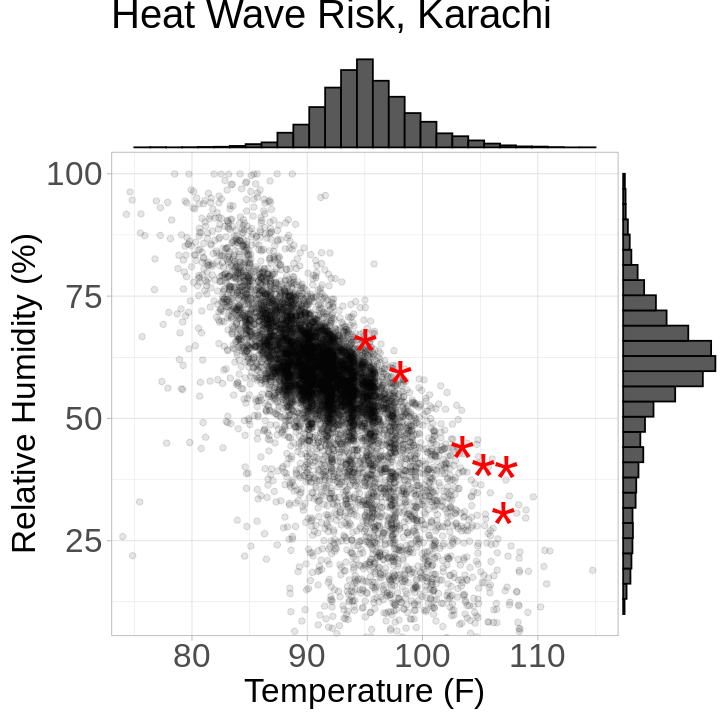

In [192]:
ggsave(filename='~/isolines_uq/plots/quals_plots/karachi_intro.png', plot=pltKa_margins, device='png', width=6, height=6)
pltKa_margins

In [193]:
options(repr.plot.width=13, repr.plot.height=6, scipen=999)
p = cowplot::plot_grid(pltSA_margins, pltKa_margins,
                   ncol = 2,
                   rel_heights = c(2, 1/2))

In [194]:
ggsave(filename='~/isolines_uq/plots/quals_plots/bivariate_extremes_intro.png', plot=p, device='png', width=13, height=6)

## Univariate to Bivariate

In [195]:
p <- 0.001
univariate_dat <- rnorm(n=5000)
univariate_q <- qnorm(1-0.001)
multivariate_dat <- data.frame(rmvnorm(n=5000, sigma = matrix(c(1, 0.7, 0.7, 1), nrow=2)))
multivariate_isoline <- drawBivGaussIsoline(numCoords=500, gridUbs=c(10, 10), gridLbs = c(-2,-2), prob=p)

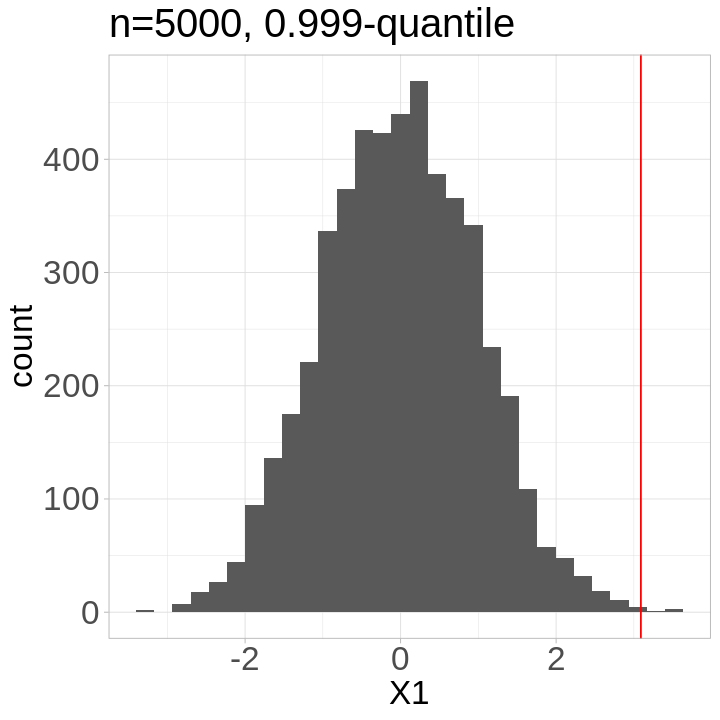

In [196]:
options(repr.plot.width=6, repr.plot.height=6, scipen=999)
plt1 <- ggplot() + geom_histogram(data=multivariate_dat, aes(x=X1), bins=30) + 
    ggtitle('n=5000, 0.999-quantile') + 
    geom_vline(xintercept=univariate_q, color='red') + 
    theme_light() +
    theme(axis.title = element_text(size = 20), 
      axis.text = element_text(size = 20), 
      text = element_text(size = 20),
      plot.title = element_text(size=24))
plt1

In [197]:
ggsave(filename='~/isolines_uq/plots/quals_plots/univariate.png', plot=plt1, device='png', width=6, height=6)

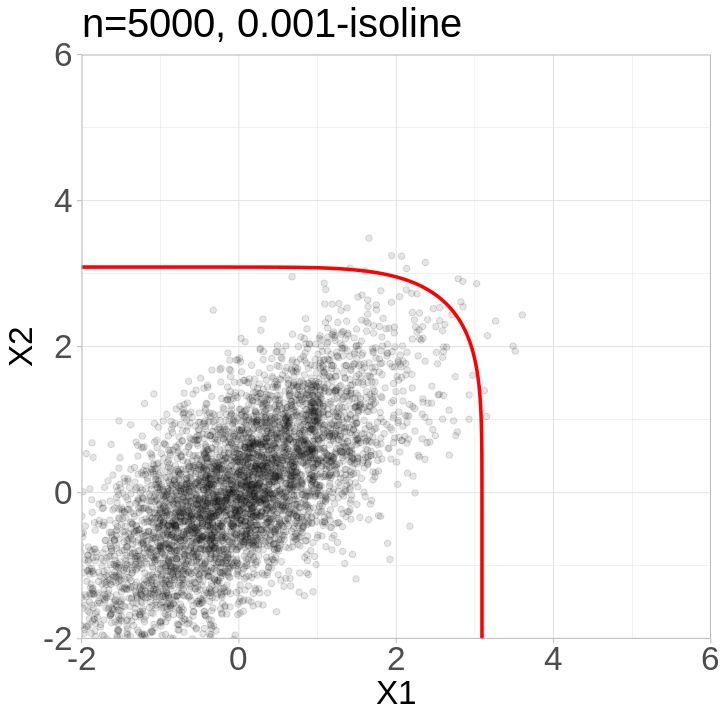

In [198]:
options(repr.plot.width=6, repr.plot.height=6, scipen=999)

plt2 <- ggplot() + geom_point(data=multivariate_dat, aes(x=X1, y=X2), alpha=0.1) + geom_line(data=multivariate_isoline, aes(x=X1, y=X2), col='red', size=1) +
coord_cartesian(ylim=c(-2, 6), xlim = c(-2, 6), expand=0) + 
#annotate("rect", fill = "blue", alpha = 0.2, 
#        xmin = as.numeric(multivariate_isoline[150,])[1], xmax = 12,
#        ymin = as.numeric(multivariate_isoline[150,])[2], ymax = 12) +
#annotate("rect", fill = "blue", alpha = 0.2, 
#        xmin = as.numeric(multivariate_isoline[400,])[1], xmax = 12,
#        ymin = as.numeric(multivariate_isoline[400,])[2], ymax = 12) 
theme_light() +
ggtitle('n=5000, 0.001-isoline') +
theme(axis.title = element_text(size = 20), 
      axis.text = element_text(size = 20), 
      text = element_text(size = 20),
      plot.title = element_text(size=24))

plt2

In [199]:
ggsave(filename='~/isolines_uq/plots/quals_plots/bivariate.png', plot=plt2, device='png', width=6, height=6)

In [200]:
options(repr.plot.width=6, repr.plot.height=6, scipen=999)

plt2 <- ggplot() + geom_point(data=multivariate_dat, aes(x=X1, y=X2), alpha=0.1) + geom_line(data=multivariate_isoline, aes(x=X1, y=X2), col='red', size=1) +
coord_cartesian(ylim=c(-2, 6), xlim = c(-2, 6), expand=0) + 
annotate("rect", fill = "blue", alpha = 0.2, 
        xmin = as.numeric(multivariate_isoline[150,])[1], xmax = 12,
        ymin = as.numeric(multivariate_isoline[150,])[2], ymax = 12) +
annotate("rect", fill = "blue", alpha = 0.2, 
        xmin = as.numeric(multivariate_isoline[400,])[1], xmax = 12,
        ymin = as.numeric(multivariate_isoline[400,])[2], ymax = 12) + 
theme_light() +
ggtitle('n=5000, 0.001-isoline') +
theme(axis.title = element_text(size = 20), 
      axis.text = element_text(size = 20), 
      text = element_text(size = 20),
      plot.title = element_text(size=24))

#plt2

In [201]:
options(repr.plot.width=13, repr.plot.height=6, scipen=999)
p = cowplot::plot_grid(plt1, plt2,
                   ncol = 2,
                   rel_heights = c(2, 1/2))

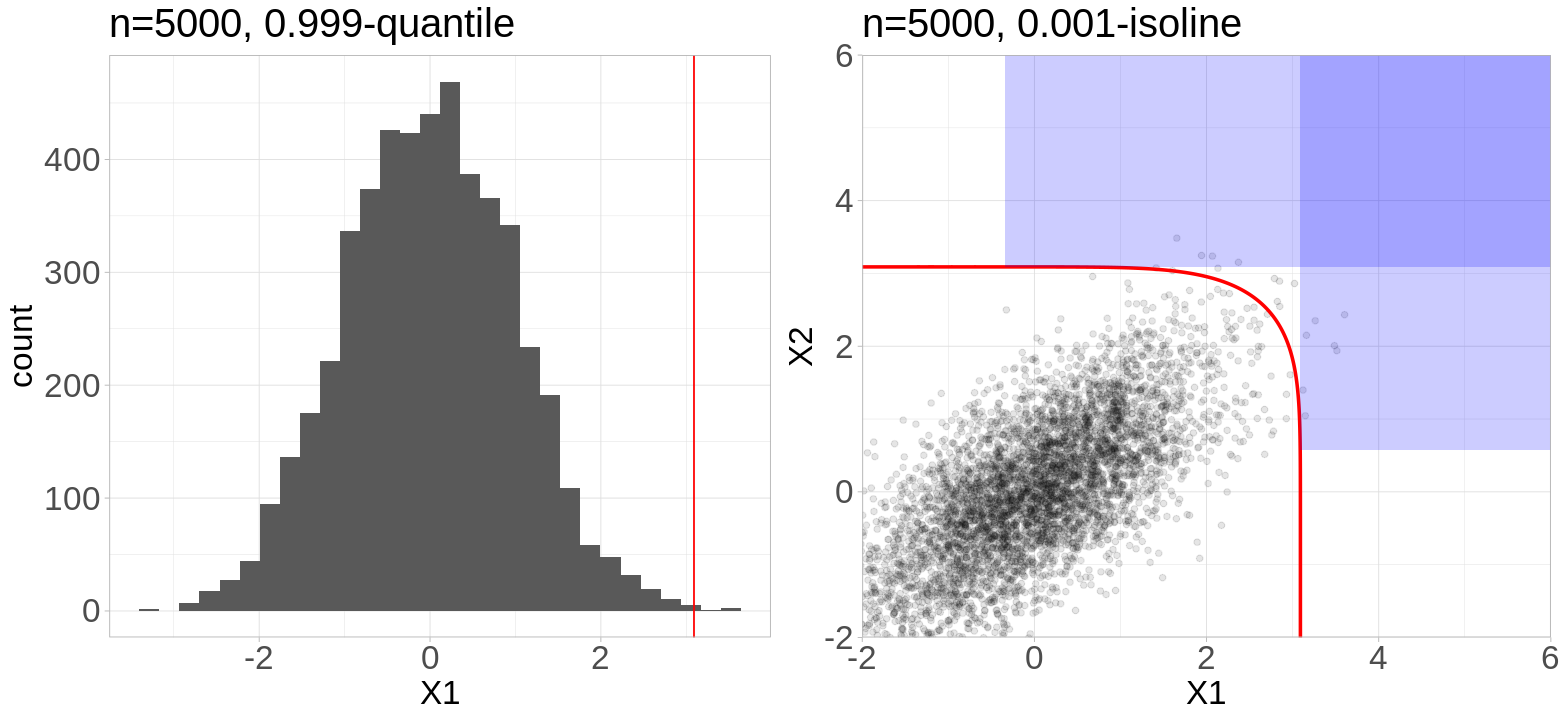

In [202]:
p

In [203]:
ggsave(filename='~/isolines_uq/plots/quals_plots/univariate_to_bivariate.png', plot=p, device='png', width=13, height=6)

## Santa Ana Data Plots

In [204]:
santa_ana_dat <- read.csv('~/isolines_uq/data/cooley_data/santa_ana_wildfires.csv')

In [205]:
santa_ana_dat <- santa_ana_dat[,c(3,4)]
colnames(santa_ana_dat) <- c('X1', 'X2')

In [206]:
lbs <- c(0, -100)
ubs <- c(15, 0)

q <- 0.01
ps <- c(0.0005)

# using original function from Cooley (2019)
res <- xContours(dat=santa_ana_dat, baseContourLevel=q, projContourLevels=ps, gridSize=100)
q_isoline_SA <- data.frame(res$contourOrig)
p_isoline_SA <- data.frame(res$projContours[[1]])

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”


In [207]:
options(repr.plot.width=6, repr.plot.height=6, scipen=999)

plt <- ggplot() + geom_point(data=santa_ana_data, aes(x = X1, y = X2), alpha=0.2) + 
xlab('Wind Speed (m/s)') + ylab('Negative Relative Humidity (%)') + 
geom_point(data=ignition_dates, aes(x = windspeeds, y = neg_relHum), color = 'red', size=13, shape='*') +
#geom_line(data=q_isoline_SA, aes(x=X1, y=X2, color='0.01-isoline'), size=1) + 
#geom_line(data=p_isoline_SA, aes(x=X1, y=X2, color='0.0005-isoline'), size=1) + 
coord_cartesian(ylim=c(-100, 0), xlim = c(0, 15), expand=F) +
theme_light() + 
ggtitle('Santa Ana Wildfire Risk, CA') + 
theme(legend.position = c(0.75, 0.2), 
      legend.title = element_blank(), 
      axis.title = element_text(size = 20), 
      axis.text = element_text(size = 20), 
      legend.spacing.y = unit(0.002, 'cm'),
      text = element_text(size = 20),
      plot.title = element_text(size=24),
      legend.text = element_text(size=15),
      legend.background = element_blank(),
      legend.box.background = element_rect(fill = "white", color = "black"))

ggsave('~/isolines_uq/plots/cooley_demo_data.png', plt)

Saving 6.67 x 6.67 in image


In [208]:
options(repr.plot.width=6, repr.plot.height=6, scipen=999)

plt <- ggplot() + geom_point(data=santa_ana_data, aes(x = X1, y = X2), alpha=0.2) + 
xlab('Wind Speed (m/s)') + ylab('Negative Relative Humidity (%)') + 
geom_point(data=ignition_dates, aes(x = windspeeds, y = neg_relHum), color = 'red', size=13, shape='*') +
geom_line(data=q_isoline_SA, aes(x=X1, y=X2, color='0.01-isoline'), size=1) + 
#geom_line(data=p_isoline_SA, aes(x=X1, y=X2, color='0.0005-isoline'), size=1) + 
coord_cartesian(ylim=c(-100, 0), xlim = c(0, 15), expand=F) +
theme_light() + 
ggtitle('Santa Ana Wildfire Risk, CA') + 
theme(legend.position = c(0.75, 0.2), 
      legend.title = element_blank(), 
      axis.title = element_text(size = 20), 
      axis.text = element_text(size = 20), 
      legend.spacing.y = unit(0.002, 'cm'),
      text = element_text(size = 20),
      plot.title = element_text(size=24),
      legend.text = element_text(size=15),
      legend.background = element_blank(),
      legend.box.background = element_rect(fill = "white", color = "black"))

ggsave('~/isolines_uq/plots/cooley_demo_base.png', plt)

Saving 6.67 x 6.67 in image


In [209]:
options(repr.plot.width=6, repr.plot.height=6, scipen=999)

plt <- ggplot() + geom_point(data=santa_ana_data, aes(x = X1, y = X2), alpha=0.2) + 
xlab('Wind Speed (m/s)') + ylab('Negative Relative Humidity (%)') + 
geom_point(data=ignition_dates, aes(x = windspeeds, y = neg_relHum), color = 'red', size=13, shape='*') +
geom_line(data=q_isoline_SA, aes(x=X1, y=X2, color='0.01-isoline'), size=1) + 
geom_line(data=p_isoline_SA, aes(x=X1, y=X2, color='0.0005-isoline'), size=1) + 
coord_cartesian(ylim=c(-100, 0), xlim = c(0, 15), expand=F) +
theme_light() + 
ggtitle('Santa Ana Wildfire Risk, CA') + 
theme(legend.position = c(0.75, 0.2), 
      legend.title = element_blank(), 
      axis.title = element_text(size = 20), 
      axis.text = element_text(size = 20), 
      legend.spacing.y = unit(0.002, 'cm'),
      text = element_text(size = 20),
      plot.title = element_text(size=24),
      legend.text = element_text(size=15),
      legend.background = element_blank(),
      legend.box.background = element_rect(fill = "white", color = "black"))

ggsave('~/isolines_uq/plots/cooley_demo_proj.png', plt)

Saving 6.67 x 6.67 in image


In [159]:
gticks <- 400
grid <- expand.grid(X1 = seq(lbs[1], ubs[1], length.out = gticks),
                    X2 = seq(lbs[2], ubs[2], length.out = gticks))

grid_obj <- list()
grid_obj$lbs <- lbs
grid_obj$ubs <- ubs
grid_obj$grid <- grid

beta_funcs_dict <- list()
beta_funcs_dict[[as.character(1/2)]] <- function(n) {return((1/n)^(1/2))}

base_out <- drawBaseRegions(santa_ana_data, grid_obj, alphas = c(0.05), ps = c(q), B=500, beta_funcs_dict=beta_funcs_dict)
base_out <- base_out[[1]]

In [173]:
proj_out <- projectBaseRegion(base_out, proj_p=ps[1], asympIndep=FALSE)

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”


In [174]:
end_pt_1 <- proj_out[[3]][which.min(proj_out[[3]][,2]),]
end_pt_2 <- proj_out[[4]][which.min(proj_out[[4]][,2]),]
end_pt_3 <- c(end_pt_1[1,1], -100)
end_pt_4 <- c(end_pt_2[1,1], -100)
tube_top <- rbind(proj_out[[3]], end_pt_3)
tube_bottom <- rbind(proj_out[[4]], end_pt_4)

Saving 6.67 x 6.67 in image


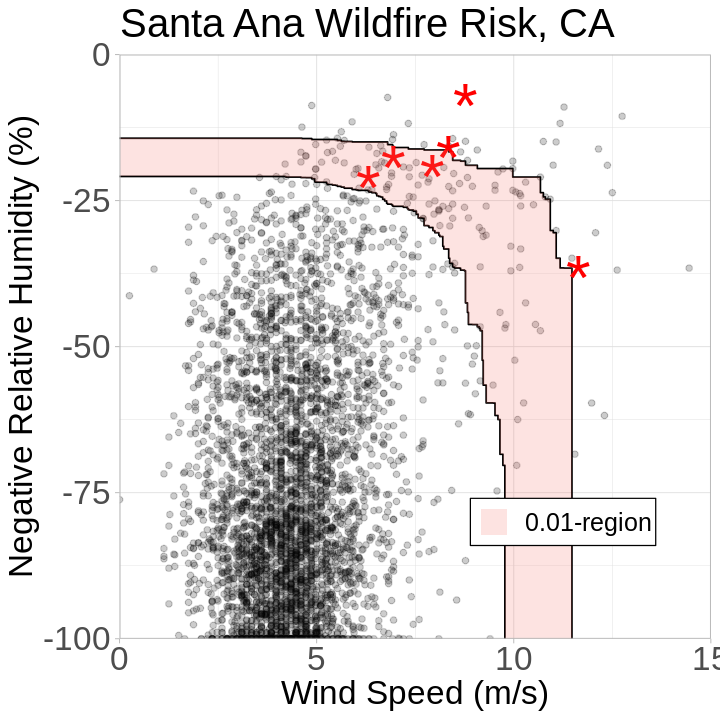

In [182]:
options(repr.plot.width=6, repr.plot.height=6, scipen=999)

polygon1 <- rbind(base_out[[1]], 
                 data.frame(t(rev(data.frame(t(base_out[[2]]))))))
polygon2 <- rbind(tube_top, 
                 data.frame(t(rev(data.frame(t(tube_bottom))))))

n <- nrow(base_out$data)
p <- base_out$p
alpha <- base_out$alpha

plt <- ggplot() + geom_point(data=base_out$data, aes(x=X1, y=X2), alpha=0.2) + 
geom_line(data=base_out[[1]], aes(x=X1, y=X2)) +
geom_point(data=ignition_dates, aes(x = windspeeds, y = neg_relHum), color = 'red', size=13, shape='*') +
geom_line(data=base_out[[2]], aes(x=X1, y=X2)) +
#geom_line(data=proj_out[[3]], aes(x=X1, y=X2)) +
#geom_line(data=proj_out[[4]], aes(x=X1, y=X2)) +
geom_polygon(data=polygon1, aes(x=X1, y=X2, fill='0.01-region'), alpha=0.2) +
#geom_polygon(data=polygon2, aes(x=X1, y=X2, fill='0.0005-region'), alpha=0.2) +
coord_cartesian(ylim=c(-100, 0), xlim = c(0, 15), expand=F) +
xlab('Wind Speed (m/s)') + ylab('Negative Relative Humidity (%)') + 
theme_light() + 
ggtitle('Santa Ana Wildfire Risk, CA') + 
theme(legend.position = c(0.75, 0.2), 
      legend.title = element_blank(), 
      axis.title = element_text(size = 20), 
      axis.text = element_text(size = 20), 
      legend.spacing.y = unit(0.002, 'cm'),
      text = element_text(size = 20),
      plot.title = element_text(size=24),
      legend.text = element_text(size=15),
      legend.background = element_blank(),
      legend.box.background = element_rect(fill = "white", color = "black"))

plt
ggsave('~/isolines_uq/plots/proposed_demo_base.png', plt)

Saving 6.67 x 6.67 in image


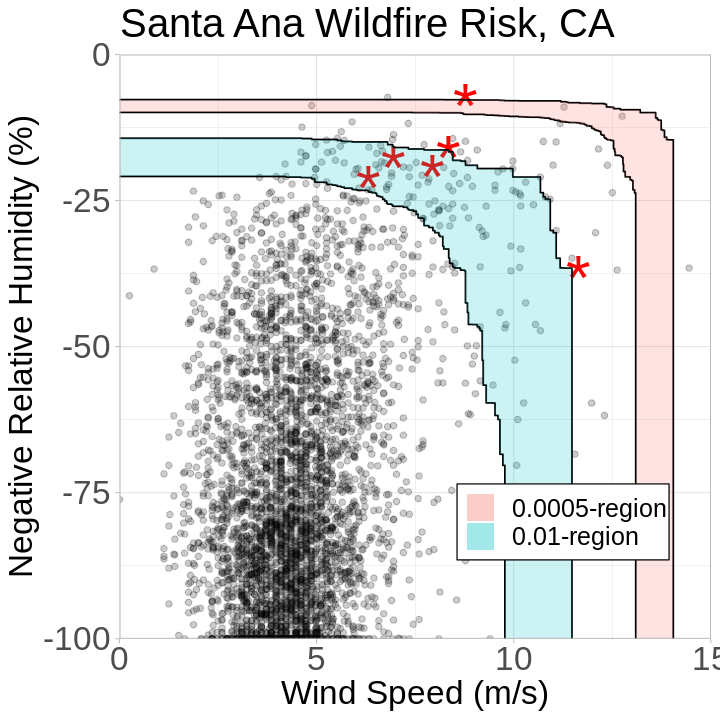

In [183]:
options(repr.plot.width=6, repr.plot.height=6, scipen=999)

polygon1 <- rbind(base_out[[1]], 
                 data.frame(t(rev(data.frame(t(base_out[[2]]))))))
polygon2 <- rbind(tube_top, 
                 data.frame(t(rev(data.frame(t(tube_bottom))))))

n <- nrow(base_out$data)
p <- base_out$p
alpha <- base_out$alpha

plt <- ggplot() + geom_point(data=base_out$data, aes(x=X1, y=X2), alpha=0.2) +
geom_point(data=ignition_dates, aes(x = windspeeds, y = neg_relHum), color = 'red', size=13, shape='*') +
geom_line(data=base_out[[1]], aes(x=X1, y=X2)) +
geom_line(data=base_out[[2]], aes(x=X1, y=X2)) +
geom_line(data=tube_top, aes(x=X1, y=X2)) +
geom_line(data=tube_bottom, aes(x=X1, y=X2)) +
geom_polygon(data=polygon1, aes(x=X1, y=X2, fill='0.01-region'), alpha=0.2) +
geom_polygon(data=polygon2, aes(x=X1, y=X2, fill='0.0005-region'), alpha=0.2) +
coord_cartesian(ylim=c(-100, 0), xlim = c(0, 15), expand=F) +
xlab('Wind Speed (m/s)') + ylab('Negative Relative Humidity (%)') + 
theme_light() + 
ggtitle('Santa Ana Wildfire Risk, CA') + 
theme(legend.position = c(0.75, 0.2), 
      legend.title = element_blank(), 
      axis.title = element_text(size = 20), 
      axis.text = element_text(size = 20), 
      legend.spacing.y = unit(0.002, 'cm'),
      text = element_text(size = 20),
      plot.title = element_text(size=24),
      legend.text = element_text(size=15),
      legend.background = element_blank(),
      legend.box.background = element_rect(fill = "white", color = "black"))

plt
ggsave('~/isolines_uq/plots/proposed_demo_proj.png', plt)

In [28]:
plt <- ggplot() + geom_point(data=santa_ana_data, aes(x = X1, y = X2), alpha=0.2) + 
xlab('Wind Speed (m/s)') + ylab('Negative Relative Humidity (%)') + 
#geom_point(data=ignition_dates, aes(x = windspeeds, y = neg_relHum), color = 'red', size=13, shape='*') +
geom_line(data=q_isoline_SA, aes(x=X1, y=X2, color='0.01-isoline'), size=1) + 
geom_line(data=p_isoline_SA, aes(x=X1, y=X2, color='0.0005-isoline'), size=1) + 
coord_cartesian(ylim=c(-100, 0), xlim = c(0, 15), expand=F) +
theme_light() + 
ggtitle('Santa Ana Wildfire Risk, CA') + 
theme(legend.position = c(0.75, 0.2), 
      legend.title = element_blank(), 
      axis.title = element_text(size = 20), 
      axis.text = element_text(size = 20), 
      legend.spacing.y = unit(0.002, 'cm'),
      text = element_text(size = 20),
      plot.title = element_text(size=24),
      legend.text = element_text(size=15),
      legend.background = element_blank(),
      legend.box.background = element_rect(fill = "white", color = "black"))

ggsave('~/isolines_uq/plots/cooley_demo_proj.png', plt)

Saving 6.67 x 6.67 in image


Saving 6.67 x 6.67 in image


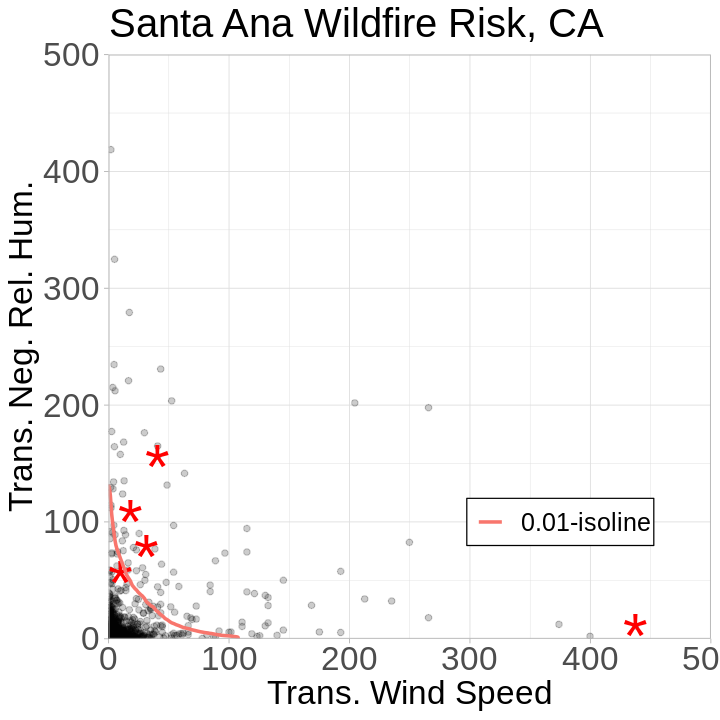

In [29]:
options(repr.plot.width=6, repr.plot.height=6, scipen=999)

frec_dat <- data.frame(res$f)
ignition_dates_frec <- frec_dat[ignition_inds,]
q_isoline_SA_frec <- data.frame(res$contourFrec)

plt <- ggplot() + geom_point(data=frec_dat, aes(x = X1, y = X2), alpha=0.2) + 
xlab('Trans. Wind Speed') + ylab('Trans. Neg. Rel. Hum.') + 
geom_point(data=ignition_dates_frec, aes(x = X1, y = X2), color = 'red', size=13, shape='*') +
geom_line(data=q_isoline_SA_frec, aes(x=X1, y=X2, color='0.01-isoline'), size=1) + 
#geom_line(data=p_isoline_SA, aes(x=X1, y=X2, color='0.0005-isoline'), size=1) + 
coord_cartesian(ylim=c(0, 500), xlim = c(0, 500), expand=F) +
theme_light() + 
ggtitle('Santa Ana Wildfire Risk, CA') + 
theme(legend.position = c(0.75, 0.2), 
      legend.title = element_blank(), 
      axis.title = element_text(size = 20), 
      axis.text = element_text(size = 20), 
      legend.spacing.y = unit(0.002, 'cm'),
      text = element_text(size = 20),
      plot.title = element_text(size=24),
      legend.text = element_text(size=15),
      legend.background = element_blank(),
      legend.box.background = element_rect(fill = "white", color = "black"))

plt
ggsave('~/isolines_uq/plots/cooley_demo_base_frec.png', plt)

Saving 6.67 x 6.67 in image


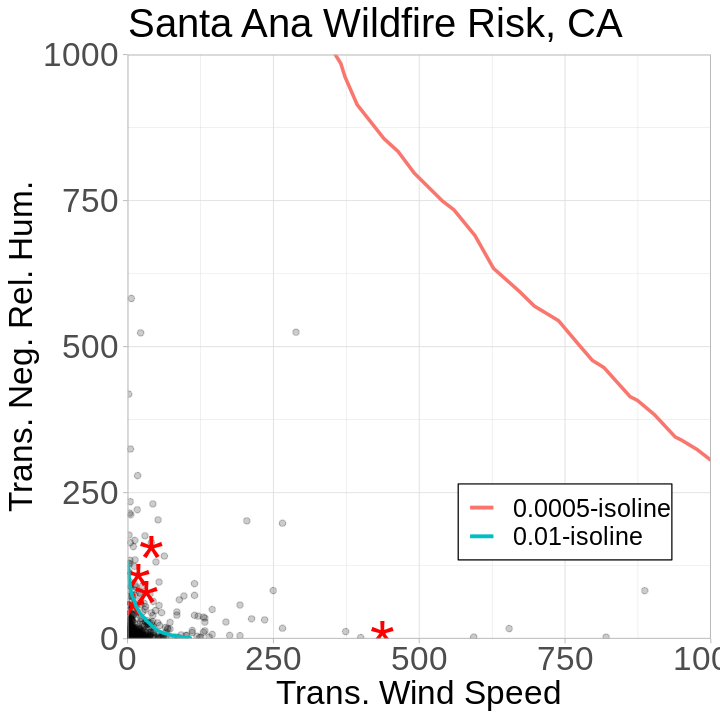

In [30]:
options(repr.plot.width=6, repr.plot.height=6, scipen=999)

frec_dat <- data.frame(res$f)
ignition_dates_frec <- frec_dat[ignition_inds,]
q_isoline_SA_frec <- data.frame(res$contourFrec)
p_isoline_SA_frec <- data.frame(res$projContoursFrec[[1]])

plt <- ggplot() + geom_point(data=frec_dat, aes(x = X1, y = X2), alpha=0.2) + 
xlab('Trans. Wind Speed') + ylab('Trans. Neg. Rel. Hum.') + 
geom_point(data=ignition_dates_frec, aes(x = X1, y = X2), color = 'red', size=13, shape='*') +
geom_line(data=q_isoline_SA_frec, aes(x=X1, y=X2, color='0.01-isoline'), size=1) + 
geom_line(data=p_isoline_SA_frec, aes(x=X1, y=X2, color='0.0005-isoline'), size=1) + 
coord_cartesian(ylim=c(0, 1000), xlim = c(0, 1000), expand=F) +
theme_light() + 
ggtitle('Santa Ana Wildfire Risk, CA') + 
theme(legend.position = c(0.75, 0.2), 
      legend.title = element_blank(), 
      axis.title = element_text(size = 20), 
      axis.text = element_text(size = 20), 
      legend.spacing.y = unit(0.002, 'cm'),
      text = element_text(size = 20),
      plot.title = element_text(size=24),
      legend.text = element_text(size=15),
      legend.background = element_blank(),
      legend.box.background = element_rect(fill = "white", color = "black"))

plt
ggsave('~/isolines_uq/plots/cooley_demo_proj_frec.png', plt)

Saving 6.67 x 6.67 in image


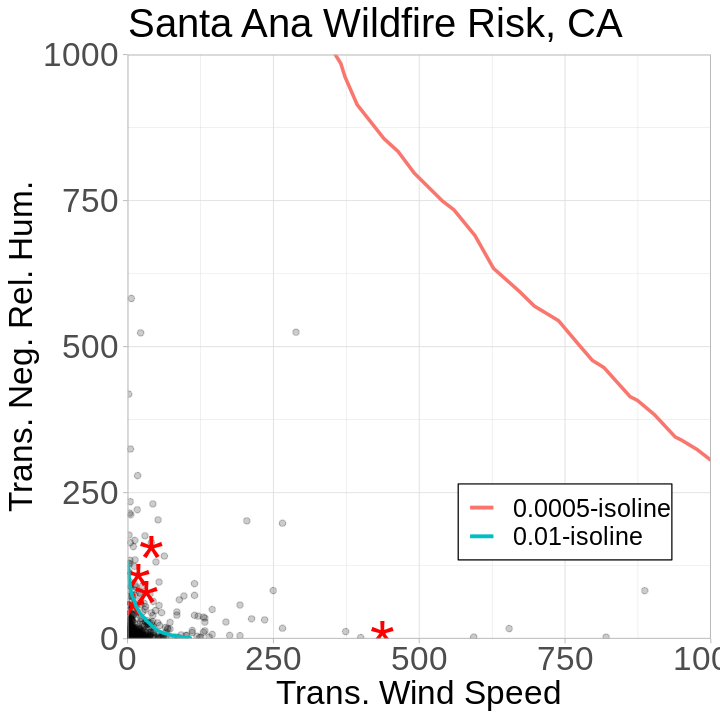

In [31]:
options(repr.plot.width=6, repr.plot.height=6, scipen=999)

frec_dat <- data.frame(res$f)
ignition_dates_frec <- frec_dat[ignition_inds,]
q_isoline_SA_frec <- data.frame(res$contourFrec)
p_isoline_SA_frec <- data.frame(res$projContoursFrec[[1]])

plt <- ggplot() + geom_point(data=frec_dat, aes(x = X1, y = X2), alpha=0.2) + 
xlab('Trans. Wind Speed') + ylab('Trans. Neg. Rel. Hum.') + 
geom_point(data=ignition_dates_frec, aes(x = X1, y = X2), color = 'red', size=13, shape='*') +
geom_line(data=q_isoline_SA_frec, aes(x=X1, y=X2, color='0.01-isoline'), size=1) + 
geom_line(data=p_isoline_SA_frec, aes(x=X1, y=X2, color='0.0005-isoline'), size=1) + 
coord_cartesian(ylim=c(0, 1000), xlim = c(0, 1000), expand=F) +
theme_light() + 
ggtitle('Santa Ana Wildfire Risk, CA') + 
theme(legend.position = c(0.75, 0.2), 
      legend.title = element_blank(), 
      axis.title = element_text(size = 20), 
      axis.text = element_text(size = 20), 
      legend.spacing.y = unit(0.002, 'cm'),
      text = element_text(size = 20),
      plot.title = element_text(size=24),
      legend.text = element_text(size=15),
      legend.background = element_blank(),
      legend.box.background = element_rect(fill = "white", color = "black"))

plt
ggsave('~/isolines_uq/plots/cooley_demo_proj_frec.png', plt)

## Karachi Data Plots

In [32]:
pltKa <- ggplot() + geom_point(data=karachi_data, aes(x = X1, y = X2), alpha=0.1) + 
geom_point(data=heat_wave_dates, aes(x = temp, y = relHum), color = 'red', size=13, shape='*') +
xlab('Temperature (F)') + ylab('Relative Humidity (%)') + theme_light() +
ggtitle('Heat Wave Risk, Karachi') + 
coord_cartesian(ylim=c(10, 100), xlim = c(75, 115)) +
theme(legend.position = c(0.75, 0.87), 
      legend.title = element_blank(), 
      axis.title = element_text(size = 20), 
      axis.text = element_text(size = 20), 
      legend.spacing.y = unit(0.002, 'cm'),
      text = element_text(size = 20),
      plot.title = element_text(size=24),
      legend.text = element_text(size=15),
      legend.background = element_blank(),
      legend.box.background = element_rect(fill = "white", color = "black"))
pltKa_margins <- ggMarginal(pltKa, type='histogram')

## Isolines Coverage Results

### Base Region Results

#### Bivariate t

In [210]:
# loading the dataframe of results
bivt_path <- paste0(perlpath, '/sims/regions/base_coverage_create_tubes/bivt/400x400_on_[-2,5]x[-2,5]/isolinenumCoords_500.RData')
bivt_res <- readRDS(bivt_path)
bivt_res$n <- as.integer(bivt_res$n)

res <- bivt_res %>% 
group_by(n, alpha, p, beta_func) %>% 
summarize(covrate=mean(covered))

# alpha for 1-alpha binomial confidence intervals 
meta_alpha <- 0.05
uncertainty <- qnorm(1-(meta_alpha/2))*(sqrt((res$covrate*(1-res$covrate))/500))
uncertainty <- round(uncertainty, 3)
res$uncertainty <- uncertainty

`summarise()` has grouped output by 'n', 'alpha', 'p'. You can override using
the `.groups` argument.


In [211]:
options(repr.plot.width=7, repr.plot.height=7)
a <- 0.01
plt1 <- ggplot(res %>% filter(alpha==a), aes(color=as.factor(p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Bivariate t, \u03b1 = ', a)) + 
scale_color_discrete(labels = paste0('q = ', as.character(unique(res$p)))) +
theme(legend.title=element_blank(), legend.position=c(0.15,0.2), 
      legend.background=element_blank(), axis.text.x=element_text(size=20), axis.text.y=element_text(size=20),
     axis.title.x=element_text(size=20), axis.title.y=element_text(size=20), plot.title = element_text(size=24),
     legend.text=element_text(size=20))

In [212]:
options(repr.plot.width=7, repr.plot.height=7)
a <- 0.05 
plt2 <- ggplot(res %>% filter(alpha==a), aes(color=as.factor(p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Bivariate t, \u03b1 = ', a)) + 
scale_color_discrete(labels = paste0('q = ', as.character(unique(res$p)))) +
theme(legend.title=element_blank(), legend.position=c(0.15,0.2), 
      legend.background=element_blank(), axis.text.x=element_text(size=20), axis.text.y=element_text(size=20),
     axis.title.x=element_text(size=20), axis.title.y=element_text(size=20), plot.title = element_text(size=24),
     legend.text=element_text(size=20))

In [213]:
options(repr.plot.width=7, repr.plot.height=7)
a <- 0.1
plt3 <- ggplot(res %>% filter(alpha==a), aes(color=as.factor(p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Bivariate t, \u03b1 = ', a)) + 
scale_color_discrete(labels = paste0('q = ', as.character(unique(res$p)))) +
theme(legend.title=element_blank(), legend.position=c(0.15,0.2), 
      legend.background=element_blank(), axis.text.x=element_text(size=20), axis.text.y=element_text(size=20),
     axis.title.x=element_text(size=20), axis.title.y=element_text(size=20), plot.title = element_text(size=24),
     legend.text=element_text(size=20))

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


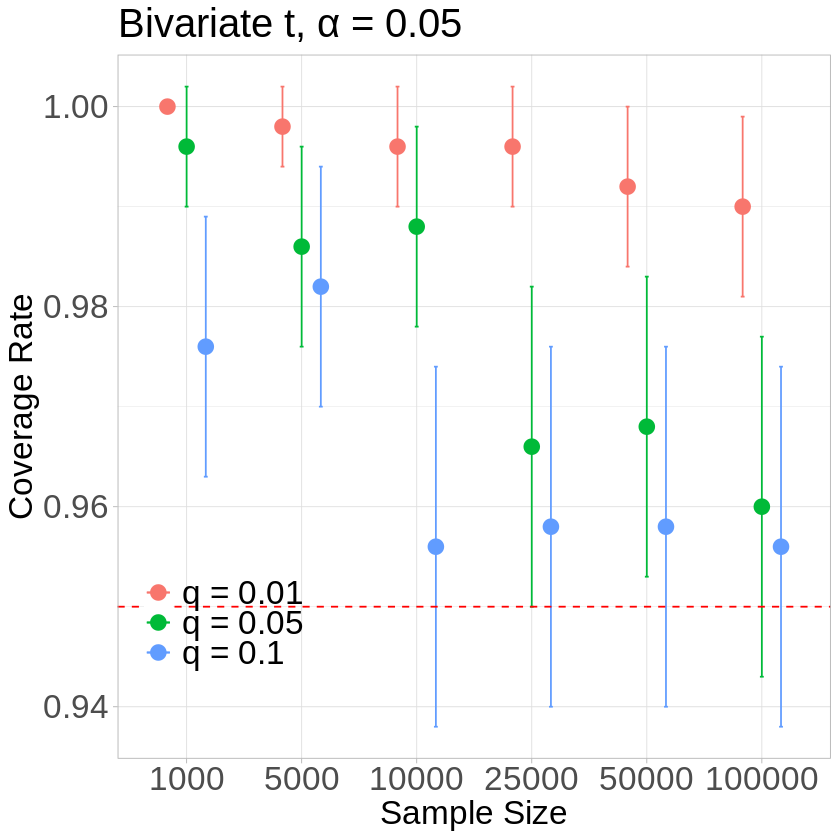

In [216]:
plt2
ggsave('~/isolines_uq/plots/bivt_base_cov_single.png', plt2, height=7, width=7)

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


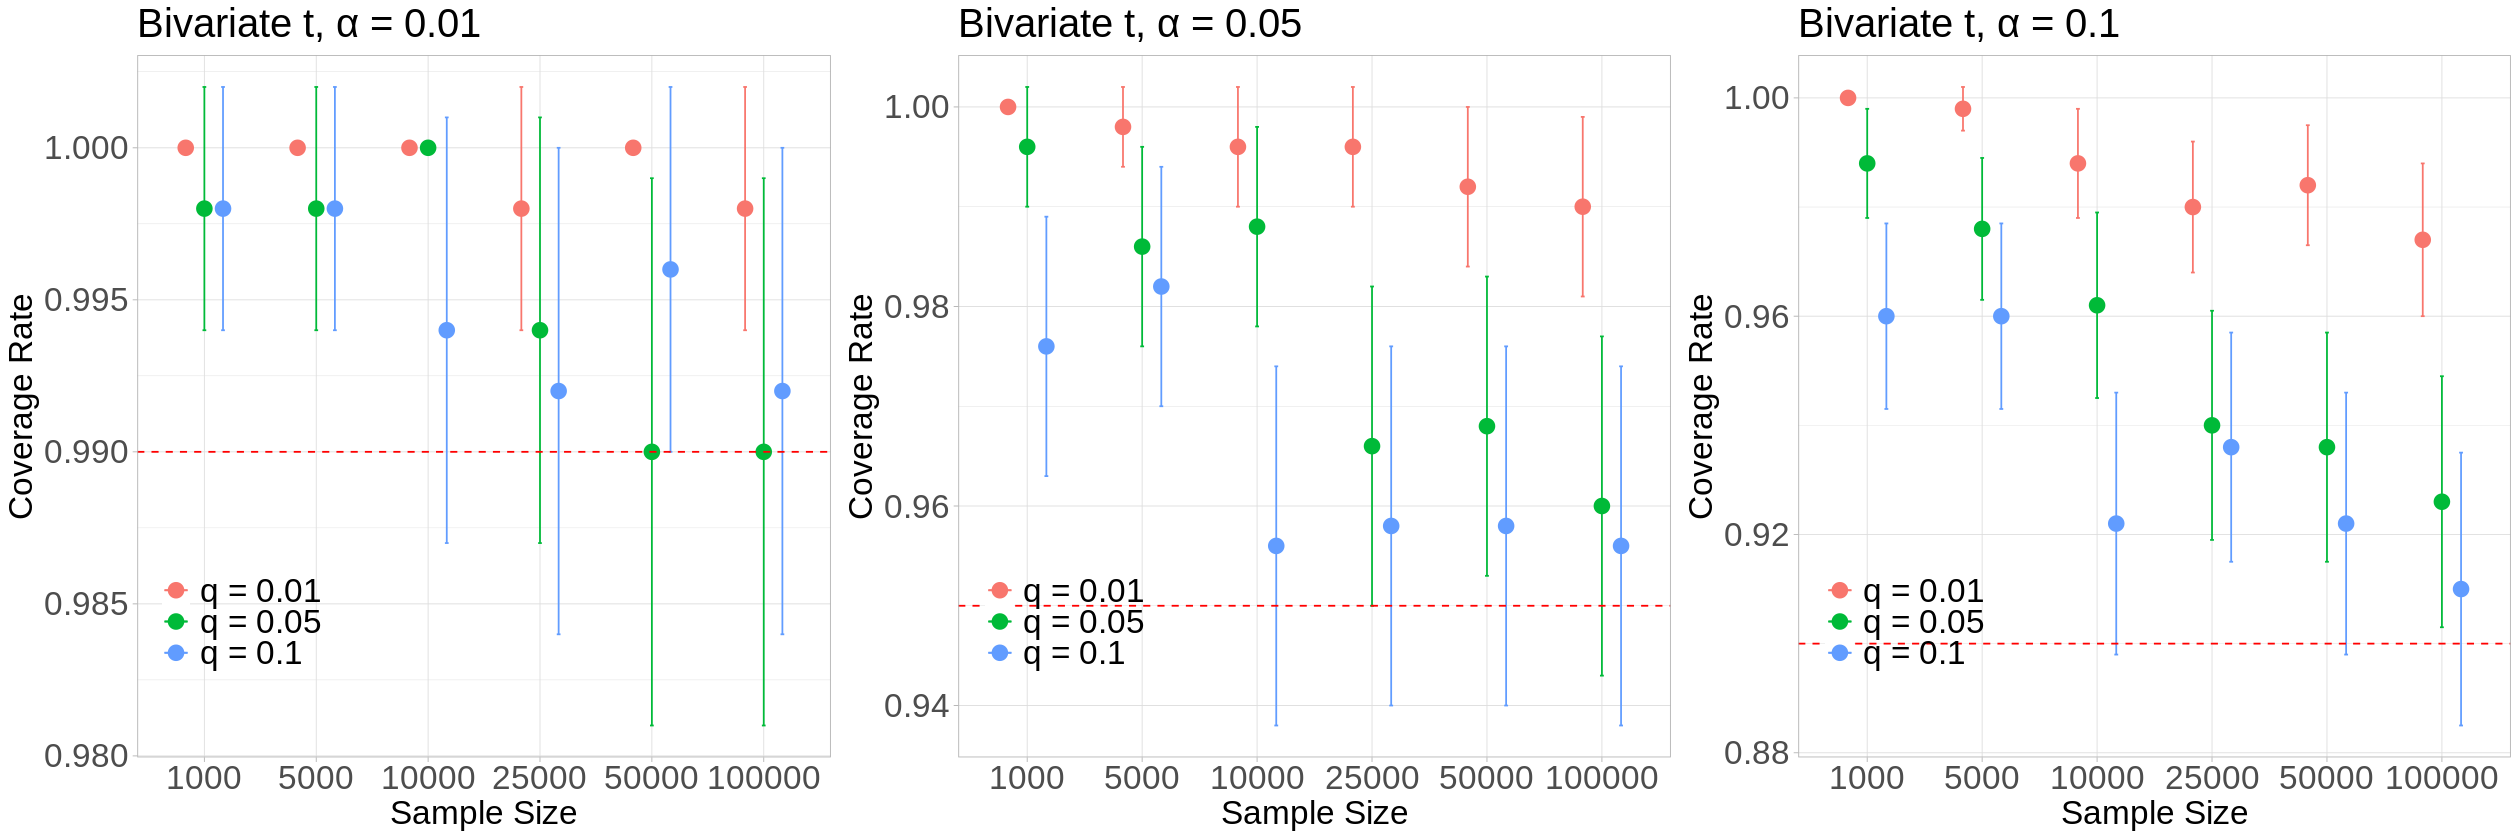

In [81]:
options(repr.plot.width=21, repr.plot.height=7, scipen = 999)
p = cowplot::plot_grid(plt1, plt2, plt3,
                   ncol = 3,
                   rel_heights = c(2, 1/2))
ggsave('~/isolines_uq/plots/bivt_base_cov.png', p, height=7, width=21)
p

#### Bivariate Gaussian

In [83]:
# loading the dataframe of results
bivgauss_path <- paste0(perlpath, '/sims/regions/base_coverage_create_tubes/bivgauss/400x400_on_[-1,3]x[-1,3]/isolinenumCoords_500.RData')
bivgauss_res <- readRDS(bivgauss_path)
bivgauss_res$n <- as.integer(bivgauss_res$n)

res <- bivgauss_res %>% 
group_by(n, alpha, p, beta_func) %>% 
summarize(covrate=mean(covered))

meta_alpha <- 0.05
uncertainty <- qnorm(1-(meta_alpha/2))*(sqrt((res$covrate*(1-res$covrate))/500))
uncertainty <- round(uncertainty, 3)
res$uncertainty <- uncertainty

`summarise()` has grouped output by 'n', 'alpha', 'p'. You can override using
the `.groups` argument.


In [96]:
options(repr.plot.width=7, repr.plot.height=7)
a <- 0.01
plt1 <- ggplot(res %>% filter(alpha==a), aes(color=as.factor(p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Bivariate Gaussian, \u03b1 = ', a)) + 
scale_color_discrete(labels = paste0('q = ', as.character(unique(res$p)))) +
theme(legend.title=element_blank(), legend.position=c(0.15,0.2), 
      legend.background=element_blank(), axis.text.x=element_text(size=20), axis.text.y=element_text(size=20),
     axis.title.x=element_text(size=20), axis.title.y=element_text(size=20), plot.title = element_text(size=24),
     legend.text=element_text(size=20))

In [97]:
options(repr.plot.width=7, repr.plot.height=7)
a <- 0.05
plt2 <- ggplot(res %>% filter(alpha==a), aes(color=as.factor(p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Bivariate Gaussian, \u03b1 = ', a)) + 
scale_color_discrete(labels = paste0('q = ', as.character(unique(res$p)))) + 
theme(legend.title=element_blank(), legend.position=c(0.15,0.2), 
      legend.background=element_blank(), axis.text.x=element_text(size=20), axis.text.y=element_text(size=20),
     axis.title.x=element_text(size=20), axis.title.y=element_text(size=20), plot.title = element_text(size=24),
     legend.text=element_text(size=20))

In [98]:
options(repr.plot.width=7, repr.plot.height=7)
a <- 0.1
plt3 <- ggplot(res %>% filter(alpha==a), aes(color=as.factor(p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Bivariate Gaussian, \u03b1 = ', a)) + 
scale_color_discrete(labels = paste0('q = ', as.character(unique(res$p)))) +
theme(legend.title=element_blank(), legend.position=c(0.15,0.2), 
      legend.background=element_blank(), axis.text.x=element_text(size=20), axis.text.y=element_text(size=20),
     axis.title.x=element_text(size=20), axis.title.y=element_text(size=20), plot.title = element_text(size=24),
     legend.text=element_text(size=20))

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


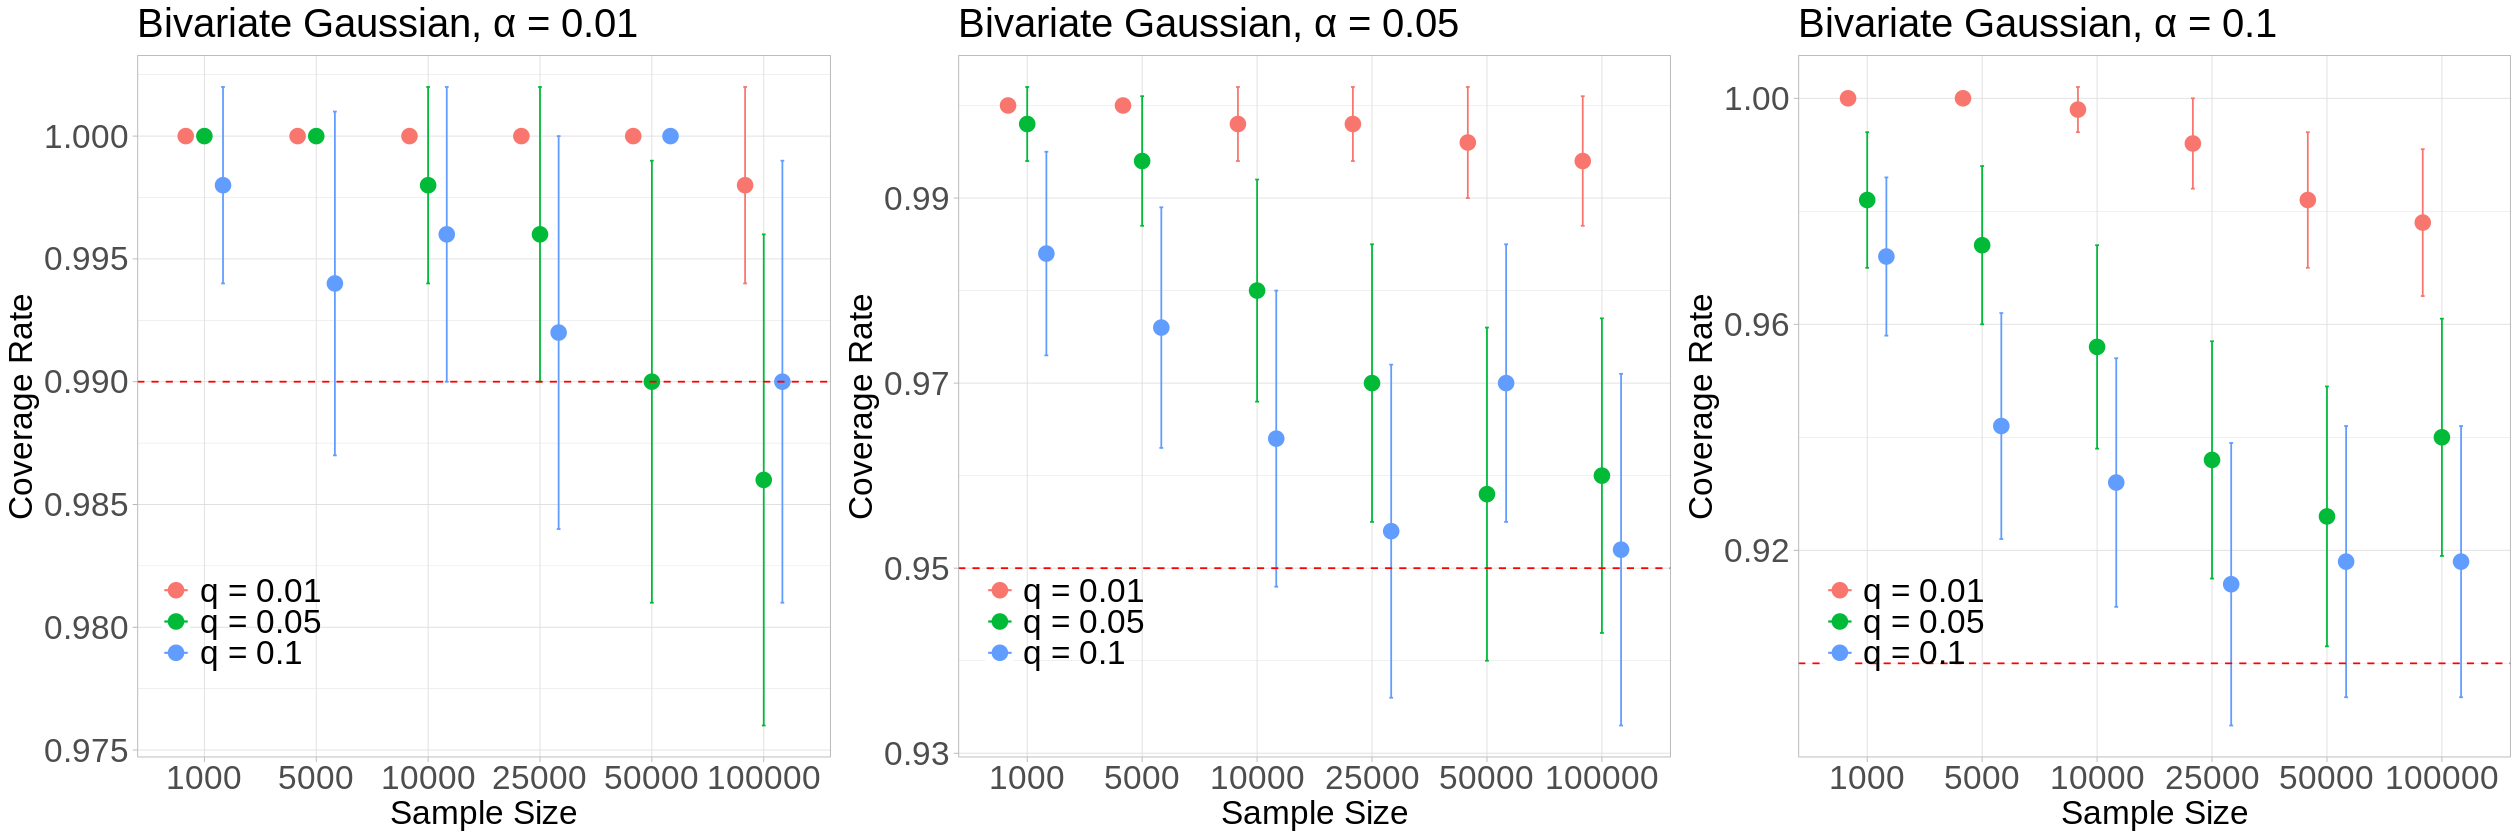

In [99]:
options(repr.plot.width=21, repr.plot.height=7, scipen = 999)
p = cowplot::plot_grid(plt1, plt2, plt3,
                   ncol = 3,
                   rel_heights = c(2, 1/2))
ggsave('~/isolines_uq/plots/bivgauss_base_cov.png', p, height=7, width=21)
p

### Projected Region Results

#### Bivariate t

In [219]:
path <- paste0(perlpath, '/sims/regions/proj_coverage_create_tubes/bivt/400x400_on_[-2,5]x[-2,5]/projectingto_0.001/isolinenumCoords_500.RData')
res <- readRDS(path)

res <- res %>% 
group_by(n, alpha, base_p, beta_func) %>% 
summarize(covrate=mean(covered))

meta_alpha <- 0.05
uncertainty <- qnorm(1-(meta_alpha/2))*(sqrt((res$covrate*(1-res$covrate))/500))
uncertainty <- round(uncertainty, 3)
res$uncertainty <- uncertainty

`summarise()` has grouped output by 'n', 'alpha', 'base_p'. You can override
using the `.groups` argument.


In [220]:
options(repr.plot.width=7, repr.plot.height=7, scipen = 999)
a <- 0.01
plt1 <- ggplot(res %>% filter(alpha==a), aes(color=as.factor(base_p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(base_p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Bivariate t, \u03b1 = ', a)) + 
scale_color_discrete(labels = paste0('q = ', as.character(unique(res$base_p)))) +
theme(legend.title=element_blank(), legend.position=c(0.15,0.2), 
      legend.background=element_blank(), axis.text.x=element_text(size=20), axis.text.y=element_text(size=20),
     axis.title.x=element_text(size=20), axis.title.y=element_text(size=20), plot.title = element_text(size=24),
     legend.text=element_text(size=20))
#ggsave('~/isolines_uq/plots/bivt_0.001proj_0.01a.png', plt, height=7, width=7)

In [221]:
options(repr.plot.width=7, repr.plot.height=7, scipen = 999)
a <- 0.05
plt2 <- ggplot(res %>% filter(alpha==a), aes(color=as.factor(base_p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(base_p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Bivariate t, \u03b1 = ', a)) + 
scale_color_discrete(labels = paste0('q = ', as.character(unique(res$base_p)))) +
theme(legend.title=element_blank(), legend.position=c(0.15,0.2), 
      legend.background=element_blank(), axis.text.x=element_text(size=20), axis.text.y=element_text(size=20),
     axis.title.x=element_text(size=20), axis.title.y=element_text(size=20), plot.title = element_text(size=24),
     legend.text=element_text(size=20))

In [117]:
options(repr.plot.width=7, repr.plot.height=7, scipen = 999)
a <- 0.1
plt3 <- ggplot(res %>% filter(alpha==a), aes(color=as.factor(base_p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(base_p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Bivariate t, \u03b1 = ', a)) + 
scale_color_discrete(labels = paste0('q = ', as.character(unique(res$base_p)))) +
theme(legend.title=element_blank(), legend.position=c(0.15,0.2), 
      legend.background=element_blank(), axis.text.x=element_text(size=20), axis.text.y=element_text(size=20),
     axis.title.x=element_text(size=20), axis.title.y=element_text(size=20), plot.title = element_text(size=24),
     legend.text=element_text(size=20))

In [223]:
ggsave('~/isolines_uq/plots/bivt_0.001_proj_single.png', plt2, height=7, width=7)

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


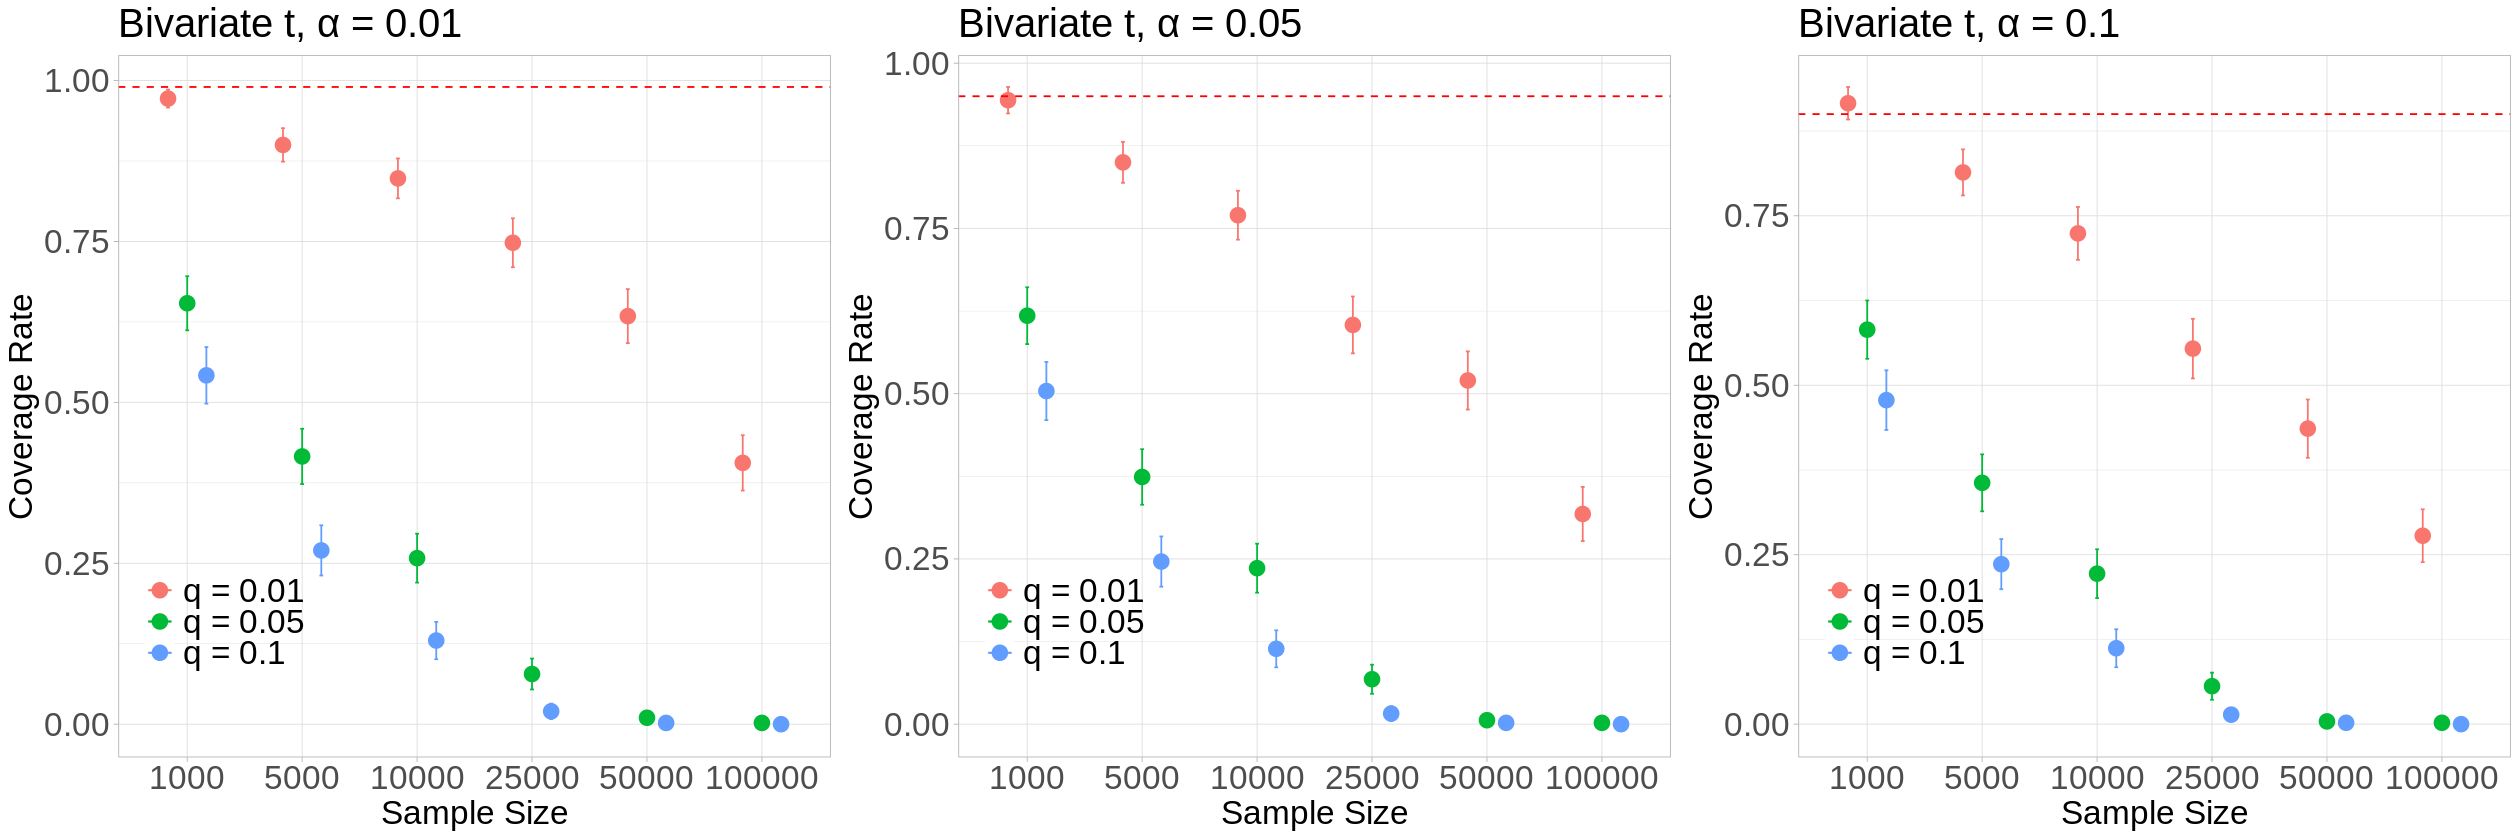

In [118]:
options(repr.plot.width=21, repr.plot.height=7, scipen = 999)
p = cowplot::plot_grid(plt1, plt2, plt3,
                   ncol = 3,
                   rel_heights = c(2, 1/2))
ggsave('~/isolines_uq/plots/bivt_0.001proj.png', p, height=7, width=21)
p

#### Bivariate Karachi

In [126]:
# loading the dataframe of results
bivkarachi_path <- paste0(perlpath, '/sims/regions/base_coverage_create_tubes/karachi/400x400_on_[50,140]x[0,100]/isolinenumCoords_500.RData')
bivkarachi_res <- readRDS(bivkarachi_path)
bivkarachi_res$n <- as.integer(bivkarachi_res$n)

res <- bivkarachi_res %>% 
group_by(n, alpha, p, beta_func) %>% 
summarize(covrate=mean(covered))

meta_alpha <- 0.05
uncertainty <- qnorm(1-(meta_alpha/2))*(sqrt((res$covrate*(1-res$covrate))/500))
uncertainty <- round(uncertainty, 3)
res$uncertainty <- uncertainty

`summarise()` has grouped output by 'n', 'alpha', 'p'. You can override using
the `.groups` argument.


In [127]:
options(repr.plot.width=7, repr.plot.height=7, scipen = 999)
a <- 0.01
plt1 <- ggplot(res %>% filter(alpha==a), aes(color=as.factor(p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Karachi KDE, \u03b1 = ', a)) + 
scale_color_discrete(labels = paste0('q = ', as.character(unique(res$p)))) +
theme(legend.title=element_blank(), legend.position=c(0.15,0.2), 
      legend.background=element_blank(), axis.text.x=element_text(size=20), axis.text.y=element_text(size=20),
     axis.title.x=element_text(size=20), axis.title.y=element_text(size=20), plot.title = element_text(size=24),
     legend.text=element_text(size=20))

In [128]:
options(repr.plot.width=7, repr.plot.height=7, scipen = 999)
a <- 0.05
plt2 <- ggplot(res %>% filter(alpha==a), aes(color=as.factor(p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Karachi KDE, \u03b1 = ', a)) + 
scale_color_discrete(labels = paste0('q = ', as.character(unique(res$p)))) +
theme(legend.title=element_blank(), legend.position=c(0.15,0.2), 
      legend.background=element_blank(), axis.text.x=element_text(size=20), axis.text.y=element_text(size=20),
     axis.title.x=element_text(size=20), axis.title.y=element_text(size=20), plot.title = element_text(size=24),
     legend.text=element_text(size=20))

In [129]:
options(repr.plot.width=7, repr.plot.height=7, scipen = 999)
a <- 0.1
plt3 <- ggplot(res %>% filter(alpha==a), aes(color=as.factor(p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Karachi KDE, \u03b1 = ', a)) + 
scale_color_discrete(labels = paste0('q = ', as.character(unique(res$p)))) +
theme(legend.title=element_blank(), legend.position=c(0.15,0.2), 
      legend.background=element_blank(), axis.text.x=element_text(size=20), axis.text.y=element_text(size=20),
     axis.title.x=element_text(size=20), axis.title.y=element_text(size=20), plot.title = element_text(size=24),
     legend.text=element_text(size=20))

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


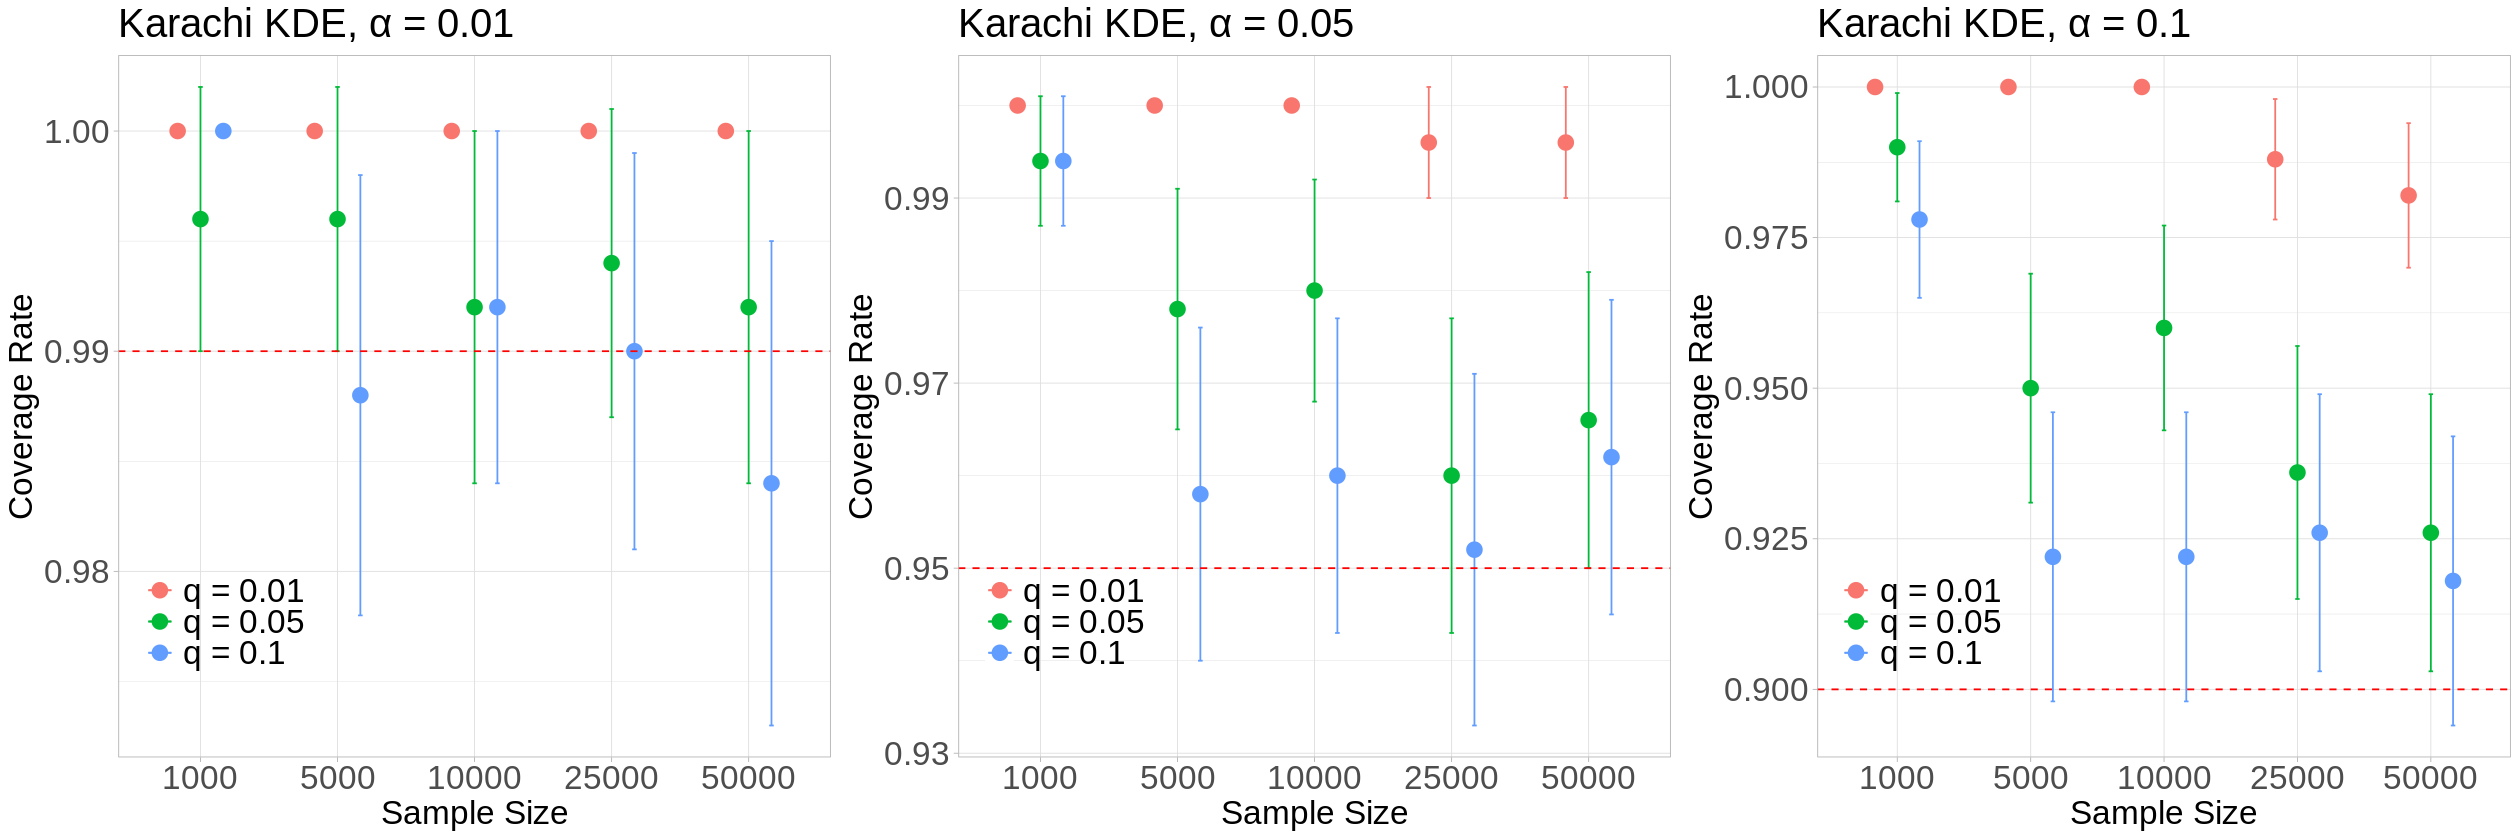

In [130]:
options(repr.plot.width=21, repr.plot.height=7, scipen = 999)
p = cowplot::plot_grid(plt1, plt2, plt3,
                   ncol = 3,
                   rel_heights = c(2, 1/2))
ggsave('~/isolines_uq/plots/bivkarachi_base_cov.png', p, height=7, width=21)
p